# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> XGBoost Regression Algorithm</p>


<p style="text-align:center; ">
<img src = "https://miro.medium.com/max/1400/1*FLshv-wVDfu-i54OqvZdHg.png" width=75%>

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p> 

    
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|1   | [<font color="#1c1c1c"> Importing Libraries</font>](#1)                   |5   | [<font color="#1c1c1c"> Splitting the Dataset into the Training Set and Test Set</font>](#5)|
|2   | [<font color="#1c1c1c"> Importing Dataset</font>](#2)                         |6   | [<font color="#1c1c1c"> XGBoost Model</font>](#6)|     
|3   | [<font color="#1c1c1c"> Data Preprocessing</font>](#3)                     |7   | [<font color="#1c1c1c"> Evaluation</font>](#7)|
|4   | [<font color="#1c1c1c"> Feature Vector and Target Variable</font>](#4)      |8   | [<font color="#1c1c1c"> Visualization</font>](#8)|       

XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

<p style="text-align:center; ">
<img src = "https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/xgboost/img-1.png" width=75%>

But what makes XGBoost so popular?

* Speed and performance : Originally written in C++, it is comparatively faster than other ensemble classifiers.

* Core algorithm is parallelizable : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.

* Consistently outperforms other algorithm methods : It has shown better performance on a variety of machine learning benchmark datasets.

* Wide variety of tuning parameters : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. But wait, what is boosting? Well, keep on reading.


<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Boosting</p>

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than 50%. Let's understand boosting in general with a simple illustration.

<p style="text-align:center; ">
<img src = "http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528107577/output_1_0_ilvuyr.png" width=75%>

Four classifiers (in 4 boxes), shown above, are trying to classify + and - classes as homogeneously as possible.

1. Box 1: The first classifier (usually a decision stump) creates a vertical line (split) at D1. It says anything to the left of D1 is + and anything to the right of D1 is -. However, this classifier misclassifies three + points.

* Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.

2. Box 2: The second classifier gives more weight to the three + misclassified points (see the bigger size of +) and creates a vertical line at D2. Again it says, anything to the right of D2 is - and left is +. Still, it makes mistakes by incorrectly classifying three - points.

3. Box 3: Again, the third classifier gives more weight to the three - misclassified points and creates a horizontal line at D3. Still, this classifier fails to classify the points (in the circles) correctly.

4. Box 4: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.

That's the basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it.

<p style="text-align:center; ">
<img src = "https://miro.medium.com/max/720/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg" width=75%>

<a id="1"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing Libraries</p>

In [2]:
!pip install xgboost

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics


<a id="2"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing the Dataset</p>

* Dataset We will be using a dataset that encapsulates the carbon dioxide emissions generated from burning coal for producing electricity power in the United States of America between 1973 and 2016. Using XGBoost, we will try to predict the carbon dioxide emissions in jupyter notebook for the next few years.

In [5]:
df = pd.read_csv('co2.csv')

In [6]:
df.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,YYYYMM,Value
0,197301,72.076000
1,197302,64.442000
2,197303,64.084000
3,197304,60.842000
4,197305,61.798000


<a id="3"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Data Preprocessing</p>

In [7]:
df.shape

(523, 2)

In [8]:
df[df.duplicated(subset='YYYYMM')]

,YYYYMM,Value


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


* We use Pandas to import the CSV file. We notice that the dataframe contains a column 'YYYYMM' that needs to be separated into 'Year' and 'Month' column. In this step, we will also remove any null values that we may have in the dataframe. Finally, we will retrieve the last five elements of the dataframe to check if our code worked. And it did!

In [10]:
df['Month'] = df.YYYYMM.astype(str).str[4:6].astype(float)
df['Year'] = df.YYYYMM.astype(str).str[0:4].astype(float)

In [11]:
df.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,YYYYMM,Value,Month,Year
0,197301,72.076000,1.000000,1973.000000
1,197302,64.442000,2.000000,1973.000000
2,197303,64.084000,3.000000,1973.000000
3,197304,60.842000,4.000000,1973.000000
4,197305,61.798000,5.000000,1973.000000


In [12]:
df.shape

(523, 4)

In [13]:
df.drop(['YYYYMM'], axis=1, inplace=True)

In [14]:
df.head().style.set_properties(**{"background-color": "#FDD667","color":"black","border": "1.5px solid black"})

,Value,Month,Year
0,72.076000,1.000000,1973.000000
1,64.442000,2.000000,1973.000000
2,64.084000,3.000000,1973.000000
3,60.842000,4.000000,1973.000000
4,61.798000,5.000000,1973.000000


In [15]:
df.dtypes

Value    float64
Month    float64
Year     float64
dtype: object

In [16]:
df.isnull().sum()

Value    0
Month    0
Year     0
dtype: int64

In [17]:
df.shape

(523, 3)

<a id="4"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Feature Vector and Target Variable</p>

In [18]:
X = df.drop(columns=['Value']).values
y = df['Value'].values

In [19]:
X

array([[1.000e+00, 1.973e+03],
       [2.000e+00, 1.973e+03],
       [3.000e+00, 1.973e+03],
       ...,
       [5.000e+00, 2.016e+03],
       [6.000e+00, 2.016e+03],
       [7.000e+00, 2.016e+03]])

In [20]:
y

array([ 72.076,  64.442,  64.084,  60.842,  61.798,  66.538,  72.626,
        75.181,  68.397,  67.668,  67.021,  71.118,  70.55 ,  62.929,
        64.519,  60.544,  64.687,  64.736,  73.698,  72.559,  63.221,
        65.418,  65.593,  71.677,  72.708,  65.117,  66.532,  61.975,
        62.031,  67.875,  74.184,  77.029,  66.156,  66.651,  67.625,
        75.857,  81.264,  71.058,  73.361,  68.703,  68.985,  73.936,
        80.968,  81.962,  72.95 ,  74.746,  78.924,  84.49 ,  87.215,
        75.943,  75.092,  68.641,  74.916,  80.942,  90.667,  89.046,
        80.975,  77.369,  78.058,  83.279,  85.191,  71.476,  67.829,
        69.051,  74.201,  81.372,  88.003,  91.836,  85.066,  79.494,
        79.291,  87.107,  93.946,  83.91 ,  83.689,  78.077,  83.19 ,
        88.15 ,  96.579,  97.246,  84.463,  86.071,  86.09 ,  94.293,
       100.568,  94.862,  93.21 ,  81.245,  82.785,  91.484, 107.126,
       106.245,  95.662,  90.03 ,  91.239, 102.138, 108.164,  94.766,
        95.724,  86.

In [21]:
data_dmatrix = xgb.DMatrix(X,label=y)
data_dmatrix

<a id="5"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Splitting the Dataset into the Training Set and Test Set
</p>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(418, 2)
(418,)
(105, 2)
(105,)


<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Feature Scaling</p>

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="6"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> XGBoost Model</p>

In [25]:
reg_mod = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1, 
    max_depth=7,
    gamma=0,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Class Validation</p>

In [26]:
scores = cross_val_score(reg_mod, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.98


In [27]:
reg_mod.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<a id="7"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Evaluation</p>

In [28]:
y_pred_test = reg_mod.predict(X_test)
y_pred_train = reg_mod.predict(X_train)

<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> R_Squared Score</p>

In [29]:
print('R^2:', metrics.r2_score(y_train, y_pred_train))
print('R^2:', metrics.r2_score(y_test, y_pred_test))

R^2: 0.9999998238842513
R^2: 0.9803218078492915


<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> MAE</p>

In [30]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

MAE: 0.010900782973001429
MAE: 3.5144520536876858


<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> MSE</p>

In [31]:
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))

MSE: 0.0001824243699986724
MSE: 18.18589199011507


<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> RMSE</p>

In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

RMSE: 0.013506456604108732
RMSE: 4.264491996723065


* As you can see, the these statistical metrics have reinstated our confidence about this model. RMSE ~ 4.26 R-Squared Score ~ 98% Now, let's visualize the original data set using the seaborn library.

<a id="8"></a>
# <p style="padding:10px;background-color:#FDD667;margin:0;color:#1c1c1c;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Visualization</p>

<AxesSubplot:xlabel='Year', ylabel='Value'>

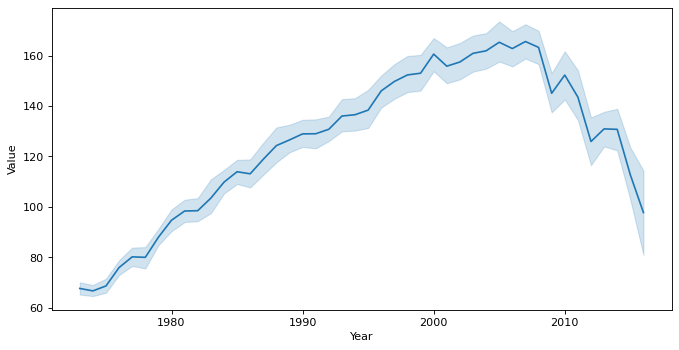

In [33]:
plt.figure(figsize=(10, 5), dpi=80)
sns.lineplot(x='Year', y='Value', data=df)

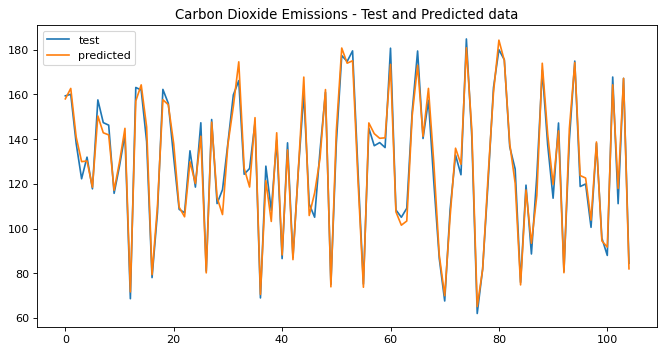

In [35]:
plt.figure(figsize=(10, 5), dpi=80)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, y_pred_test, label="predicted")
plt.title("Carbon Dioxide Emissions - Test and Predicted data")
plt.legend()
plt.show()

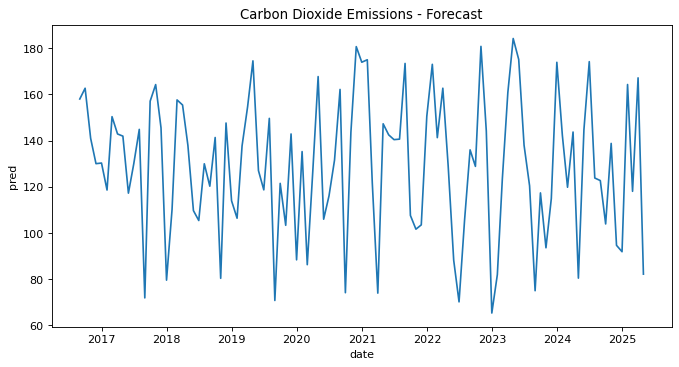

In [36]:
plt.figure(figsize=(10, 5), dpi=80)
df=pd.DataFrame(y_pred_test, columns=['pred']) 
df['date'] = pd.date_range(start='8/1/2016', periods=len(df), freq='M')
sns.lineplot(x='date', y='pred', data=df)
plt.title("Carbon Dioxide Emissions - Forecast")
plt.show()